In [7]:
# Pandas is used for data manipulation
import pandas as pd

# Use numpy to convert to arrays
import numpy as np

# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split

# Time formatter
import datetime

import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import regularizers
from tensorflow.keras import metrics
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential




In [ ]:
case = np.load('/zdata2/cpasilla/MARCH2019_ALL/ML_INPUT/DNB_full_moon_norm-12_predictors/data.npz')
case.files # case['Xdata_train'].shape, case['Xdata_test'].shape

In [16]:
Xtrain = case["Xdata_train"][:10,:,:,0].flatten()
Xtest = case['Xdata_test'][:2,:,:,0].flatten()
Ytrain = case['Ydata_train'][:10].flatten()
Ytest = case["Ydata_test"][:2].flatten()

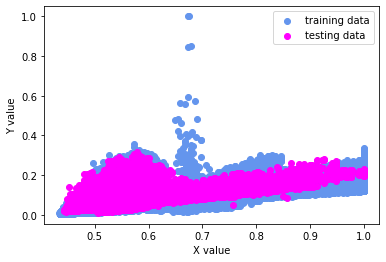

In [17]:
plt.scatter(Xtrain, Ytrain, color='cornflowerblue', label='training data')
plt.scatter(Xtest, Ytest, color='fuchsia', label = 'testing data')
plt.xlabel('X value')
plt.ylabel('Y value')
plt.legend()
plt.show()

In [11]:
# define functional fits
def my_fit(m,c,x):
     # m is the slope of the line
     # c is the y-intercept
     # x is the values to evaluate
     # output: y, the evaluated values
    y = m*x + c
    return y

def my_gradLoss(xtrain,ytrain,ypred):
    n = float(len(xtrain))
    gradLoss_m = 2/n * sum(xtrain * (ypred-ytrain)) #derivative wrt m
    gradLoss_c = 2/n * sum((ypred-ytrain)) #derivative wrt c
    
    return gradLoss_m, gradLoss_c

In [18]:
# Building the model
m = np.random.uniform()
c = np.random.uniform()

L = 0.001                                                         # MODIFY: the learning rate - the size of the "step" to take down gradient
epochs = 400                                                     # MODIFY: the number of iterations to run over the entire training set 

errorHistory = np.empty((epochs,))
# Performing Gradient Descent 
for i in range(epochs): 

    Y_pred = my_fit(m,c,Xtrain)                                    # the current predicted value of y
    gradLoss_m, gradLoss_c = my_gradLoss(Xtrain, Ytrain, Y_pred)   # compute the direction of down gradient of the loss function with respect to the coefficients
    m = m - L * gradLoss_m                                         # update the slope m
    c = c - L * gradLoss_c                                         # update the y-intercept c
    
    errorHistory[i] = 1/float(len(Ytrain))*np.sum((Ytrain - Y_pred)**2)
    if[i]
print('done training')    
print('')
print('  slope (m)             y-int (c)')
print('----------------------------------')
print (str(np.around(m,5)) + '                 ' + str(np.around(c,5)))

# Making predictions - FINAL
Y_pred = my_fit(m,c,Xtrain)
Y_predTest = my_fit(m,c,Xtest)

done training

  slope (m)             y-int (c)
----------------------------------
0.33278                 0.22054


NameError: name 'stats' is not defined

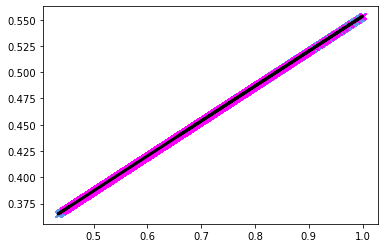

In [20]:
plt.figure()
#plt.scatter(Xtrain, Ytrain, color='black', label = 'data') 
plt.plot(Xtrain, Y_pred, 'x', color='cornflowerblue', label = 'training data') 
plt.plot(Xtest, Y_predTest, 'x', color='fuchsia', label= 'testing data') 
plt.plot(Xtrain, Y_pred,'-k', label='fit by ANN', linewidth=3) # regression line



slope, intercept, r_value, p_value, std_err = stats.linregress(np.squeeze(X),np.squeeze(Y))
plt.plot(X,intercept+X*slope,'--',color = 'red', label = 'LSQ: x vs y', linewidth=1)

plt.legend()
plt.show()

 #print the error history
plt.figure()
plt.plot(np.arange(0,len(errorHistory)),errorHistory,'.-')
plt.title('loss function')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()